Projekt Archivstatistik

These/Fragestellung: "Wieviel Geschichte hat dein Kanton?"

Spannend wäre es natürlich zu schauen, wieviel Dokumente zu einem Kanton überhaupt in den diversen Archiven lagern. Da wäre von den Daten her - zumindest theoretisch - schon etwas möglich. Da die Daten aber sehr dezentral und heterogen voliegen, wäre das ein Megaprojekt. Hier dehalb einmal eine Begrenzung auf die kantonalen Staatsarchive: Wieviele historische Dokumente sind hier für die Öffentlichkeit zugänglich? Wieviele kommen jährlich hinzu? Wie unterscheiden sich die Kantone?

Als Datengrundlage dienen die Archivstatistik, Jahresrechnungen der Kantonsarchive und die Bevölkerungsstatistik.

In [1]:
# from bs4 import BeautifulSoup
# import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

df_archive = pd.read_excel("Zahlentabelle_2013-2016.xlsx")

In [2]:
df_archive.head(5)

,Statistiques d'archives suisses Schweizerische Archivstatistik 2013-2016,Total,Unnamed: 2,Unnamed: 3,Unnamed: 4,AG : Aargau,Unnamed: 6,Unnamed: 7,Unnamed: 8,AI : Appenzell Innerrhoden,...,Unnamed: 107,Unnamed: 108,Bundesarchiv,Unnamed: 110,Unnamed: 111,Unnamed: 112,Liechtenstein,Unnamed: 114,Unnamed: 115,Unnamed: 116
NaN,NaN,2013,2014,2015,2016,2013,2014,2015,2016,2013,...,2015,2016,2013.0,2014,2015.0,2016,2013,2014,2015,2016
1.0,Ressources des services d’archives\nArchivress...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Nombre d’employés à durée indéterminée plein t...,409,420,420,420,11,10,10,9,1,...,60,60,75.0,74,77.0,78,9,9,9,8
NaN,Nombre de postes fixes à plein temps\nAnzahl E...,285.8,300.7,306.6,294.55,10,8.7,8.7,8.4,1,...,36.8,36.8,61.4,56.7,59.7,59.5,6.5,6.5,6.4,6.5
NaN,Nombre d’employés à durée déterminée\nAnzahl B...,137,184.5,221.5,196,n.a.,28,48,31,1,...,30,30,8.0,3,2.0,7,8,5,5,1


In [3]:
df_archive.shape

(42, 117)

Um mit der Tabelle arbeiten zu können, habe ich sie umgekehrt (tranposed)

In [4]:
df_archive = pd.read_excel("Archivstatistik_Transposed.xlsx")
df_archive

,Region,Jahr,1.1.0 Anzahl Beschäftigte auf Etatstellen,1.2.0 Anzahl Etatstellen,1.3.0 Anzahl Beschäftigte auf Temporärstellen,1.4.0 Anzahl Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,3.1.0 Laufmeter Neuzugänge im Berichtsjahr,3.2.0 Laufmeter neu erschlossenes Archivgut,...,5.1.3 Anzahl Besuchende der Webseite,5.1.4 Anzahl Besuche der Website (länger als 15 Minuten),5.2.1 Anzahl online recherchierbarer Verzeichnungseinheiten,5.2.2 Anzahl Seitenaufrufe im Online-Verzeichnis,5.2.3 Anzahl Besuchende im Online-Verzeichnis,5.2.4 Anzahl Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Anzahl online nutzbarer Archivalieneinheiten,5.3.2 Anzahl online genutzter Archivalieneinheiten,5.3.3 Anzahl Besuchende im Viewer,5.3.4 Anzahl Besuche im Viewer
0,Total,2013.0,409,285.8,137,77.4,354’934,14’720’429,9’330,10’317,...,493’385,71’904,6’679’302,17’331’061,349’238,758’148,2’405’205,2’813’307,146’638,216’447
1,Total,2014.0,420,300.7,185,83.3,363’576,16’501’395,11’378,7’063,...,548’723,54’613,7’099’392,18’991’162,402’011,1’209’296,3’327’327,263’424,2’064,193’725
2,Total,2015.0,420,306.6,222,85.7,365’227,16’642’645,10’984,9’224,...,872’797,50’610,7’445’249,24’829’541,359’190,938’542,3’046’641,5’502’534,49’603,138’105
3,Total,2016.0,420,294.6,196,75.3,376’434,16’717’172,10’004,8’426,...,667’636,111’513,9’208’365,19’001’296,1’386’984,1’369’550,3’188’787,10’487’800,53’668,359’411
4,AG : Aargau,2013.0,11,10,n.a.,8.9,10’600,n.a.,220,256,...,4016 **,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
5,AG : Aargau,2014.0,10,8.7,28,13.4,10’868,239’809,248,300,...,5’084,n.a.,36’058,n.a.,n.a.,n.a.,0,0,0,0
6,AG : Aargau,2015.0,10,8.7,48,18,11’161,289’946,297,267,...,4’603,n.a.,50’137,37’039,3’856,18’158,0,0,0,0
7,AG : Aargau,2016.0,9,8.4,31,13.7,11’401,287’831,240,185,...,4’829,n.a.,110’937,98’793,8’146,46’683,1’500,n.a.,n.a.,n.a.
8,AI : Appenzell Innerrhoden,2013.0,1,1,1,0.3,n.a.,18’537,63,51,...,n.a.,n.a.,0,0,0,0,0,0,0,0
9,AI : Appenzell Innerrhoden,2014.0,1,1,1,0.2,n.a.,24’284,32,52,...,n.a.,n.a.,0,0,0,0,0,0,0,0


In [5]:
df_archive.dtypes

Region                                                                 object
Jahr                                                                  float64
1.1.0 Anzahl Beschäftigte auf Etatstellen                              object
1.2.0 Anzahl Etatstellen                                               object
1.3.0 Anzahl Beschäftigte auf Temporärstellen                          object
1.4.0 Anzahl Temporärstellen                                           object
2.1.0 Laufmeter erschlossenes Archivgut (Papier)                       object
2.2.0 Gesamtanzahl der Verzeichnungseinträge                           object
3.1.0 Laufmeter Neuzugänge im Berichtsjahr                             object
3.2.0 Laufmeter neu erschlossenes Archivgut                            object
3.3.0 Anzahl neu erfasster Verzeichnungseinträge                       object
4.1.1 Anzahl Arbeitsplätze im Lesesaal                                 object
4.1.2 Anzahl Öffnungstage pro Woche                             

In [6]:
#Viele Daten werden nicht als integer oder float gelesen, was die Datenauswertung behindert.
df_archive

,Region,Jahr,1.1.0 Anzahl Beschäftigte auf Etatstellen,1.2.0 Anzahl Etatstellen,1.3.0 Anzahl Beschäftigte auf Temporärstellen,1.4.0 Anzahl Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,3.1.0 Laufmeter Neuzugänge im Berichtsjahr,3.2.0 Laufmeter neu erschlossenes Archivgut,...,5.1.3 Anzahl Besuchende der Webseite,5.1.4 Anzahl Besuche der Website (länger als 15 Minuten),5.2.1 Anzahl online recherchierbarer Verzeichnungseinheiten,5.2.2 Anzahl Seitenaufrufe im Online-Verzeichnis,5.2.3 Anzahl Besuchende im Online-Verzeichnis,5.2.4 Anzahl Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Anzahl online nutzbarer Archivalieneinheiten,5.3.2 Anzahl online genutzter Archivalieneinheiten,5.3.3 Anzahl Besuchende im Viewer,5.3.4 Anzahl Besuche im Viewer
0,Total,2013.0,409,285.8,137,77.4,354’934,14’720’429,9’330,10’317,...,493’385,71’904,6’679’302,17’331’061,349’238,758’148,2’405’205,2’813’307,146’638,216’447
1,Total,2014.0,420,300.7,185,83.3,363’576,16’501’395,11’378,7’063,...,548’723,54’613,7’099’392,18’991’162,402’011,1’209’296,3’327’327,263’424,2’064,193’725
2,Total,2015.0,420,306.6,222,85.7,365’227,16’642’645,10’984,9’224,...,872’797,50’610,7’445’249,24’829’541,359’190,938’542,3’046’641,5’502’534,49’603,138’105
3,Total,2016.0,420,294.6,196,75.3,376’434,16’717’172,10’004,8’426,...,667’636,111’513,9’208’365,19’001’296,1’386’984,1’369’550,3’188’787,10’487’800,53’668,359’411
4,AG : Aargau,2013.0,11,10,n.a.,8.9,10’600,n.a.,220,256,...,4016 **,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
5,AG : Aargau,2014.0,10,8.7,28,13.4,10’868,239’809,248,300,...,5’084,n.a.,36’058,n.a.,n.a.,n.a.,0,0,0,0
6,AG : Aargau,2015.0,10,8.7,48,18,11’161,289’946,297,267,...,4’603,n.a.,50’137,37’039,3’856,18’158,0,0,0,0
7,AG : Aargau,2016.0,9,8.4,31,13.7,11’401,287’831,240,185,...,4’829,n.a.,110’937,98’793,8’146,46’683,1’500,n.a.,n.a.,n.a.
8,AI : Appenzell Innerrhoden,2013.0,1,1,1,0.3,n.a.,18’537,63,51,...,n.a.,n.a.,0,0,0,0,0,0,0,0
9,AI : Appenzell Innerrhoden,2014.0,1,1,1,0.2,n.a.,24’284,32,52,...,n.a.,n.a.,0,0,0,0,0,0,0,0


Bereinigung der Daten in Excel, da viele kleine Zeichensetzungsfehler vorlagen, die sich nur schwer automatisiert bereinigen liessen. 

In [7]:
df_archivstatistik = pd.read_excel("Archivstatistik_Transposed_neu.xlsx", na_values = 'n.a.')
df_archivstatistik

,Region,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,...,5.1.3 Besuchende der Webseite,5.1.4 Besuche der Website (länger als 15 Minuten),5.2.1 Online recherchierbare Verzeichnungseinheiten,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer
0,Total,NaN,NaN,2013,409.0,285.8,137.0,77.4,354934.0,14720429.0,...,493385.0,71904.0,6679302.0,17331061.0,349238.0,758148.0,2405205.0,2813307.0,146638.0,216447.0
1,Total,NaN,NaN,2014,420.0,300.7,185.0,83.3,363576.0,16501395.0,...,548723.0,54613.0,7099392.0,18991162.0,402011.0,1209296.0,3327327.0,263424.0,2064.0,193725.0
2,Total,NaN,NaN,2015,420.0,306.6,222.0,85.7,365227.0,16642645.0,...,872797.0,50610.0,7445249.0,24829541.0,359190.0,938542.0,3046641.0,5502534.0,49603.0,138105.0
3,Total,NaN,NaN,2016,420.0,294.6,196.0,75.3,376434.0,16717172.0,...,667636.0,111513.0,9208365.0,19001296.0,1386984.0,1369550.0,3188787.0,10487800.0,53668.0,359411.0
4,AG : Aargau,19.0,NaN,2013,11.0,10.0,NaN,8.9,10600.0,NaN,...,4016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AG : Aargau,19.0,NaN,2014,10.0,8.7,28.0,13.4,10868.0,239809.0,...,5084.0,NaN,36058.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
6,AG : Aargau,19.0,NaN,2015,10.0,8.7,48.0,18.0,11161.0,289946.0,...,4603.0,NaN,50137.0,37039.0,3856.0,18158.0,0.0,0.0,0.0,0.0
7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,287831.0,...,4829.0,NaN,110937.0,98793.0,8146.0,46683.0,1500.0,NaN,NaN,NaN
8,AI : Appenzell Innerrhoden,16.0,NaN,2013,1.0,1.0,1.0,0.3,NaN,18537.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,AI : Appenzell Innerrhoden,16.0,NaN,2014,1.0,1.0,1.0,0.2,NaN,24284.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_archivstatistik.dtypes

Region                                                          object
KTNR                                                           float64
Aufwand                                                        float64
Jahr                                                             int64
1.1.0 Beschäftigte auf Etatstellen                             float64
1.2.0 Etatstellen                                              float64
1.3.0 Beschäftigte auf Temporärstellen                         float64
1.4.0 Temporärstellen                                          float64
2.1.0 Laufmeter erschlossenes Archivgut (Papier)               float64
2.2.0 Gesamtanzahl der Verzeichnungseinträge                   float64
3.1.0 Laufmeter Neuzugänge im Berichtsjahr                     float64
3.2.0 Laufmeter neu erschlossenes Archivgut                    float64
3.3.0 Neu erfasste Verzeichnungseinträge                       float64
4.1.1 Arbeitsplätze im Lesesaal                                float64
4.1.2 

In [9]:
df_archivstatistik.rename(columns={'Region':'Kanton'})
df_archivstatistik = df_archivstatistik.rename(columns={'Region':'Kanton'})
df_archivstatistik

,Kanton,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,...,5.1.3 Besuchende der Webseite,5.1.4 Besuche der Website (länger als 15 Minuten),5.2.1 Online recherchierbare Verzeichnungseinheiten,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer
0,Total,NaN,NaN,2013,409.0,285.8,137.0,77.4,354934.0,14720429.0,...,493385.0,71904.0,6679302.0,17331061.0,349238.0,758148.0,2405205.0,2813307.0,146638.0,216447.0
1,Total,NaN,NaN,2014,420.0,300.7,185.0,83.3,363576.0,16501395.0,...,548723.0,54613.0,7099392.0,18991162.0,402011.0,1209296.0,3327327.0,263424.0,2064.0,193725.0
2,Total,NaN,NaN,2015,420.0,306.6,222.0,85.7,365227.0,16642645.0,...,872797.0,50610.0,7445249.0,24829541.0,359190.0,938542.0,3046641.0,5502534.0,49603.0,138105.0
3,Total,NaN,NaN,2016,420.0,294.6,196.0,75.3,376434.0,16717172.0,...,667636.0,111513.0,9208365.0,19001296.0,1386984.0,1369550.0,3188787.0,10487800.0,53668.0,359411.0
4,AG : Aargau,19.0,NaN,2013,11.0,10.0,NaN,8.9,10600.0,NaN,...,4016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AG : Aargau,19.0,NaN,2014,10.0,8.7,28.0,13.4,10868.0,239809.0,...,5084.0,NaN,36058.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
6,AG : Aargau,19.0,NaN,2015,10.0,8.7,48.0,18.0,11161.0,289946.0,...,4603.0,NaN,50137.0,37039.0,3856.0,18158.0,0.0,0.0,0.0,0.0
7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,287831.0,...,4829.0,NaN,110937.0,98793.0,8146.0,46683.0,1500.0,NaN,NaN,NaN
8,AI : Appenzell Innerrhoden,16.0,NaN,2013,1.0,1.0,1.0,0.3,NaN,18537.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,AI : Appenzell Innerrhoden,16.0,NaN,2014,1.0,1.0,1.0,0.2,NaN,24284.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Erste Auswertungsversuche...

In [10]:
df_archivstatistik['1.2.0 Etatstellen'].count()

115

In [11]:
df_archivstatistik["1.2.0 Etatstellen"].value_counts()

3.3      5
8.0      4
11.6     4
6.7      4
5.0      4
13.1     4
9.6      4
8.2      4
4.0      4
8.3      4
6.0      4
1.0      4
36.8     4
5.1      3
2.3      3
13.9     3
15.6     3
11.3     3
2.8      3
15.5     3
6.5      3
3.0      2
16.7     2
3.8      2
8.7      2
6.6      2
15.2     2
59.5     1
2.5      1
17.6     1
285.8    1
4.7      1
6.4      1
16.6     1
300.7    1
59.7     1
17.7     1
2.9      1
17.2     1
8.4      1
2.2      1
15.4     1
56.7     1
16.2     1
1.3      1
306.6    1
14.4     1
61.4     1
5.6      1
7.6      1
294.6    1
12.3     1
10.0     1
Name: 1.2.0 Etatstellen, dtype: int64

In [12]:
df_archivstatistik['1.4.0 Temporärstellen'].count()

114

In [13]:
df_archivstatistik['1.4.0 Temporärstellen'].isna().sum()

2

In [14]:
df_archivstatistik['1.1.0 Beschäftigte auf Etatstellen'].count()

115

In [15]:
df_archivstatistik['1.3.0 Beschäftigte auf Temporärstellen'].count()

114

In [16]:
df_archivstatistik.groupby('Jahr')['1.2.0 Etatstellen'].sum() / 2 # Alles /2 da Total in der Liste ist.

Jahr
2013    298.55
2014    304.05
2015    306.60
2016    301.15
Name: 1.2.0 Etatstellen, dtype: float64

In [17]:
df_archivstatistik.groupby('Jahr')['1.2.0 Etatstellen'].mean() / 2

Jahr
2013    10.294828
2014    10.484483
2015    10.950000
2016    10.384483
Name: 1.2.0 Etatstellen, dtype: float64

In [18]:
df_archivstatistik.groupby('Jahr')['1.4.0 Temporärstellen'].sum() / 2

Jahr
2013    77.80
2014    83.35
2015    89.50
2016    79.55
Name: 1.4.0 Temporärstellen, dtype: float64

In [19]:
df_archivstatistik.groupby('Jahr')['1.4.0 Temporärstellen'].mean() / 2

Jahr
2013    2.682759
2014    2.874138
2015    3.196429
2016    2.841071
Name: 1.4.0 Temporärstellen, dtype: float64

In [20]:
df_archivstatistik['1.5.0 Stellentotal'] = df_archivstatistik['1.2.0 Etatstellen'] + df_archivstatistik['1.4.0 Temporärstellen']
df_archivstatistik['1.5.0 Stellentotal'].head(5)

0    363.2
1    384.0
2    392.3
3    369.9
4     18.9
Name: 1.5.0 Stellentotal, dtype: float64

In [21]:
df_archivstatistik['1.6.0 Beschäftigte Total'] = df_archivstatistik['1.1.0 Beschäftigte auf Etatstellen'] + df_archivstatistik['1.3.0 Beschäftigte auf Temporärstellen']

In [22]:
df_archivstatistik.head(5)

,Kanton,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,...,5.2.1 Online recherchierbare Verzeichnungseinheiten,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer,1.5.0 Stellentotal,1.6.0 Beschäftigte Total
0,Total,NaN,NaN,2013,409.0,285.8,137.0,77.4,354934.0,14720429.0,...,6679302.0,17331061.0,349238.0,758148.0,2405205.0,2813307.0,146638.0,216447.0,363.2,546.0
1,Total,NaN,NaN,2014,420.0,300.7,185.0,83.3,363576.0,16501395.0,...,7099392.0,18991162.0,402011.0,1209296.0,3327327.0,263424.0,2064.0,193725.0,384.0,605.0
2,Total,NaN,NaN,2015,420.0,306.6,222.0,85.7,365227.0,16642645.0,...,7445249.0,24829541.0,359190.0,938542.0,3046641.0,5502534.0,49603.0,138105.0,392.3,642.0
3,Total,NaN,NaN,2016,420.0,294.6,196.0,75.3,376434.0,16717172.0,...,9208365.0,19001296.0,1386984.0,1369550.0,3188787.0,10487800.0,53668.0,359411.0,369.9,616.0
4,AG : Aargau,19.0,NaN,2013,11.0,10.0,NaN,8.9,10600.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.9,NaN


Beschränkung der Auswertung auf das Jahr 2016, da in den früheren Jahren einige Werte fehlen

In [23]:
df_archivstatistik[df_archivstatistik['Jahr'] == 2016][["Jahr", "Kanton"]]

,Jahr,Kanton
3,2016,Total
7,2016,AG : Aargau
11,2016,AI : Appenzell Innerrhoden
15,2016,AR : Appenzell Ausserrhoden
19,2016,BE : Bern
23,2016,BL : Basel Land
27,2016,BS : Basel Stadt
31,2016,FR : Fribourg
35,2016,GE : Genève
39,2016,GL : Glarus


In [24]:
df_archivstatistik_2016 = df_archivstatistik[df_archivstatistik['Jahr'] == 2016]
df_archivstatistik_2016 = df_archivstatistik_2016[df_archivstatistik_2016["Kanton"] != "Total"]
df_archivstatistik_2016

,Kanton,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,...,5.2.1 Online recherchierbare Verzeichnungseinheiten,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer,1.5.0 Stellentotal,1.6.0 Beschäftigte Total
7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,287831.0,...,110937.0,98793.0,8146.0,46683.0,1500.0,NaN,NaN,NaN,22.1,40.0
11,AI : Appenzell Innerrhoden,16.0,68361.0,2016,1.0,1.0,0.0,0.0,NaN,107519.0,...,21554.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
15,AR : Appenzell Ausserrhoden,15.0,1055280.0,2016,5.0,3.3,0.0,0.0,1694.0,252667.0,...,NaN,NaN,NaN,NaN,163.0,52731.0,NaN,NaN,3.3,5.0
19,BE : Bern,2.0,3836116.0,2016,22.0,15.5,4.0,3.0,27852.0,555285.0,...,462064.0,4774890.0,268367.0,896578.0,86937.0,NaN,NaN,NaN,18.5,26.0
23,BL : Basel Land,13.0,1278890.0,2016,10.0,8.2,2.0,1.0,16286.0,599428.0,...,NaN,NaN,NaN,NaN,141481.0,NaN,NaN,NaN,9.2,12.0
27,BS : Basel Stadt,12.0,4164447.0,2016,25.0,16.7,5.0,1.9,18384.0,633616.0,...,489603.0,813029.0,68566.0,7774.0,65588.0,13441.0,3558.0,1618.0,18.6,30.0
31,FR : Fribourg,10.0,1260703.0,2016,8.0,6.0,4.0,2.6,15300.0,716000.0,...,138565.0,1249416.0,10886.0,243561.0,0.0,0.0,0.0,0.0,8.6,12.0
35,GE : Genève,25.0,NaN,2016,19.0,15.2,4.0,0.8,29900.0,155598.0,...,122849.0,1417278.0,12134.0,26398.0,2730.0,NaN,NaN,NaN,16.0,23.0
39,GL : Glarus,8.0,372926.0,2016,3.0,2.3,2.0,1.2,724.0,228751.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.0
43,GR : Graubünden,18.0,NaN,2016,12.0,8.0,5.0,1.2,6924.0,183230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2,17.0


In [25]:
df_stellentotal = df_archivstatistik_2016[["Kanton", '1.5.0 Stellentotal']]
df_stellentotal

,Kanton,1.5.0 Stellentotal
7,AG : Aargau,22.1
11,AI : Appenzell Innerrhoden,1.0
15,AR : Appenzell Ausserrhoden,3.3
19,BE : Bern,18.5
23,BL : Basel Land,9.2
27,BS : Basel Stadt,18.6
31,FR : Fribourg,8.6
35,GE : Genève,16.0
39,GL : Glarus,3.5
43,GR : Graubünden,9.2


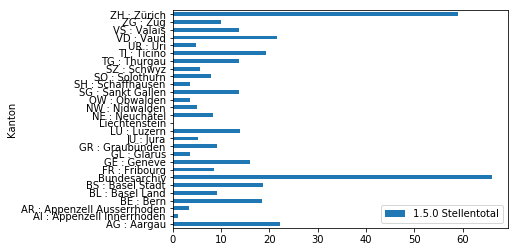

In [26]:
df_stellentotal.groupby(['Kanton']).sum().plot(kind="barh")

In [27]:
df_beschaeftigtetotal = df_archivstatistik_2016[["Kanton", '1.6.0 Beschäftigte Total']]
df_beschaeftigtetotal

,Kanton,1.6.0 Beschäftigte Total
7,AG : Aargau,40.0
11,AI : Appenzell Innerrhoden,1.0
15,AR : Appenzell Ausserrhoden,5.0
19,BE : Bern,26.0
23,BL : Basel Land,12.0
27,BS : Basel Stadt,30.0
31,FR : Fribourg,12.0
35,GE : Genève,23.0
39,GL : Glarus,5.0
43,GR : Graubünden,17.0


Jetzt kommt die Statistik mit den Einwohnerzahlen der Kantone hinzu (für das Jahr 2016)

In [28]:
df_kantonsstatistiken = pd.read_excel("Kantonsstatistiken.xlsx")
df_kantonsstatistiken

,Ausgewählte Indikatoren im regionalen Vergleich 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,T21.3.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Jahre,Schweiz,ZH,BE,LU,UR,SZ,OW,NW,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bevölkerung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Einwohner in 1000,2016,8419.55,1487.97,1026.51,403.397,36.145,155.863,37.378,42.556,...,502.552,197.55,663.462,270.709,354.375,784.822,339.176,178.567,489.524,73.122
5,Veränderung in %,2010-2016,6.98102,8.36819,4.76739,6.829,2.0411,6.22436,5.03864,3.7344,...,4.93728,2.55891,8.5035,8.96178,6.17882,10.0298,8.47245,3.76674,6.94952,4.41227
6,pro km²,2016,210.528,895.914,175.754,282.268,34.1848,183.086,77.7704,176.332,...,257.574,27.8028,475.576,313.644,129.285,278.198,65.0524,249.145,1991.39,87.2047
7,Altersverteilung in %,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0–19,NaN,20.0897,19.6943,19.0678,20.5066,20.4095,19.8129,20.4372,18.4768,...,20.7489,18.2632,20.3207,20.4832,18.3574,22.0036,19.9716,21.3421,21.134,21.4614
9,20–64,NaN,61.8207,63.4089,60.6265,62.3421,59.9032,63.0894,61.6031,62.0759,...,61.5566,61.2513,62.6265,62.5749,59.6236,61.6499,61.0046,60.02,62.3812,58.3641


In [29]:
df_kantonsstatistiken["Ausgewählte Indikatoren im regionalen Vergleich 2018"][1] = "Kanton"
"""
Umbenennen des NaN-Wertes in "Kanton", da sonst die transpose()-Methode nicht funktioniert.
"""

'\nUmbenennen des NaN-Wertes in "Kanton", da sonst die transpose()-Methode nicht funktioniert.\n'

In [30]:
"""
1. Zahl = Index der Anfangszeile
2. Zahl = Index der Schlusszeile
3. Zahl = Schrittgrösse (jede 3. Zeile)
"""
df_ks = df_kantonsstatistiken.iloc[1:5:3]
df_ks = df_ks.reset_index()
df_ks

,index,Ausgewählte Indikatoren im regionalen Vergleich 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,T21.3.2
0,1,Kanton,Jahre,Schweiz,ZH,BE,LU,UR,SZ,OW,...,SG,GR,AG,TG,TI,VD,VS,NE,GE,JU
1,4,Einwohner in 1000,2016,8419.55,1487.97,1026.51,403.397,36.145,155.863,37.378,...,502.552,197.55,663.462,270.709,354.375,784.822,339.176,178.567,489.524,73.122


In [31]:
df_ks_transposed = df_ks.transpose()
df_ks_transposed

,0,1
index,1,4
Ausgewählte Indikatoren im regionalen Vergleich 2018,Kanton,Einwohner in 1000
Unnamed: 1,Jahre,2016
Unnamed: 2,Schweiz,8419.55
Unnamed: 3,ZH,1487.97
Unnamed: 4,BE,1026.51
Unnamed: 5,LU,403.397
Unnamed: 6,UR,36.145
Unnamed: 7,SZ,155.863
Unnamed: 8,OW,37.378


In [32]:
#df_ks_transposed.rename(columns={0: 'Kanton'}, inplace=True)

In [33]:
#so geht die Umbenennung mehrerer Reihen in einem Schritt
df_ks_transposed.rename(columns={
    1 : 'Einwohner in 1000',
    0 : 'Kanton'}, inplace=True)
df_ks_transposed.copy()
df_ks_transposed.head(5)

,Kanton,Einwohner in 1000
index,1,4
Ausgewählte Indikatoren im regionalen Vergleich 2018,Kanton,Einwohner in 1000
Unnamed: 1,Jahre,2016
Unnamed: 2,Schweiz,8419.55
Unnamed: 3,ZH,1487.97


In [34]:
df_ks_transposed.reset_index()
df_ks_transposed = df_ks_transposed.reset_index()
df_ks_transposed

,index,Kanton,Einwohner in 1000
0,index,1,4
1,Ausgewählte Indikatoren im regionalen Vergleic...,Kanton,Einwohner in 1000
2,Unnamed: 1,Jahre,2016
3,Unnamed: 2,Schweiz,8419.55
4,Unnamed: 3,ZH,1487.97
5,Unnamed: 4,BE,1026.51
6,Unnamed: 5,LU,403.397
7,Unnamed: 6,UR,36.145
8,Unnamed: 7,SZ,155.863
9,Unnamed: 8,OW,37.378


In [35]:
df_ks_transposed = df_ks_transposed.iloc[4:30]
df_ks_transposed
#zuerst die ersten drei Reihen wegnehmen, dann sortieren, dann Index neu bilden.

,index,Kanton,Einwohner in 1000
4,Unnamed: 3,ZH,1487.97
5,Unnamed: 4,BE,1026.51
6,Unnamed: 5,LU,403.397
7,Unnamed: 6,UR,36.145
8,Unnamed: 7,SZ,155.863
9,Unnamed: 8,OW,37.378
10,Unnamed: 9,NW,42.556
11,Unnamed: 10,GL,40.147
12,Unnamed: 11,ZG,123.948
13,Unnamed: 12,FR,311.914


In [36]:
df_ks_transposed = df_ks_transposed[['Kanton', 'Einwohner in 1000']].copy()
df_ks_transposed

,Kanton,Einwohner in 1000
4,ZH,1487.97
5,BE,1026.51
6,LU,403.397
7,UR,36.145
8,SZ,155.863
9,OW,37.378
10,NW,42.556
11,GL,40.147
12,ZG,123.948
13,FR,311.914


In [37]:
df_ks_transposed = df_ks_transposed.sort_values('Kanton')
#df_ks_transposed = df_ks_transposed.reset_index()
df_ks_transposed

,Kanton,Einwohner in 1000
22,AG,663.462
19,AI,16.003
18,AR,54.954
5,BE,1026.51
16,BL,285.624
15,BS,193.07
13,FR,311.914
28,GE,489.524
11,GL,40.147
21,GR,197.55


In [38]:
df_ks_transposed.shape

(26, 2)

Jetzt bereite ich das Matchen der beiden Dateframes vor.

In [39]:
df_archivstatistik_2016

,Kanton,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,...,5.2.1 Online recherchierbare Verzeichnungseinheiten,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer,1.5.0 Stellentotal,1.6.0 Beschäftigte Total
7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,287831.0,...,110937.0,98793.0,8146.0,46683.0,1500.0,NaN,NaN,NaN,22.1,40.0
11,AI : Appenzell Innerrhoden,16.0,68361.0,2016,1.0,1.0,0.0,0.0,NaN,107519.0,...,21554.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
15,AR : Appenzell Ausserrhoden,15.0,1055280.0,2016,5.0,3.3,0.0,0.0,1694.0,252667.0,...,NaN,NaN,NaN,NaN,163.0,52731.0,NaN,NaN,3.3,5.0
19,BE : Bern,2.0,3836116.0,2016,22.0,15.5,4.0,3.0,27852.0,555285.0,...,462064.0,4774890.0,268367.0,896578.0,86937.0,NaN,NaN,NaN,18.5,26.0
23,BL : Basel Land,13.0,1278890.0,2016,10.0,8.2,2.0,1.0,16286.0,599428.0,...,NaN,NaN,NaN,NaN,141481.0,NaN,NaN,NaN,9.2,12.0
27,BS : Basel Stadt,12.0,4164447.0,2016,25.0,16.7,5.0,1.9,18384.0,633616.0,...,489603.0,813029.0,68566.0,7774.0,65588.0,13441.0,3558.0,1618.0,18.6,30.0
31,FR : Fribourg,10.0,1260703.0,2016,8.0,6.0,4.0,2.6,15300.0,716000.0,...,138565.0,1249416.0,10886.0,243561.0,0.0,0.0,0.0,0.0,8.6,12.0
35,GE : Genève,25.0,NaN,2016,19.0,15.2,4.0,0.8,29900.0,155598.0,...,122849.0,1417278.0,12134.0,26398.0,2730.0,NaN,NaN,NaN,16.0,23.0
39,GL : Glarus,8.0,372926.0,2016,3.0,2.3,2.0,1.2,724.0,228751.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.0
43,GR : Graubünden,18.0,NaN,2016,12.0,8.0,5.0,1.2,6924.0,183230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2,17.0


In [40]:
df_archivstatistik_2016.iloc[:26] #Bundesarchiv und Liechtenstein kommen raus.
df_archivstatistik_2016 = df_archivstatistik_2016.iloc[:26]
df_archivstatistik_2016

,Kanton,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),2.2.0 Gesamtanzahl der Verzeichnungseinträge,...,5.2.1 Online recherchierbare Verzeichnungseinheiten,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer,1.5.0 Stellentotal,1.6.0 Beschäftigte Total
7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,287831.0,...,110937.0,98793.0,8146.0,46683.0,1500.0,NaN,NaN,NaN,22.1,40.0
11,AI : Appenzell Innerrhoden,16.0,68361.0,2016,1.0,1.0,0.0,0.0,NaN,107519.0,...,21554.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0
15,AR : Appenzell Ausserrhoden,15.0,1055280.0,2016,5.0,3.3,0.0,0.0,1694.0,252667.0,...,NaN,NaN,NaN,NaN,163.0,52731.0,NaN,NaN,3.3,5.0
19,BE : Bern,2.0,3836116.0,2016,22.0,15.5,4.0,3.0,27852.0,555285.0,...,462064.0,4774890.0,268367.0,896578.0,86937.0,NaN,NaN,NaN,18.5,26.0
23,BL : Basel Land,13.0,1278890.0,2016,10.0,8.2,2.0,1.0,16286.0,599428.0,...,NaN,NaN,NaN,NaN,141481.0,NaN,NaN,NaN,9.2,12.0
27,BS : Basel Stadt,12.0,4164447.0,2016,25.0,16.7,5.0,1.9,18384.0,633616.0,...,489603.0,813029.0,68566.0,7774.0,65588.0,13441.0,3558.0,1618.0,18.6,30.0
31,FR : Fribourg,10.0,1260703.0,2016,8.0,6.0,4.0,2.6,15300.0,716000.0,...,138565.0,1249416.0,10886.0,243561.0,0.0,0.0,0.0,0.0,8.6,12.0
35,GE : Genève,25.0,NaN,2016,19.0,15.2,4.0,0.8,29900.0,155598.0,...,122849.0,1417278.0,12134.0,26398.0,2730.0,NaN,NaN,NaN,16.0,23.0
39,GL : Glarus,8.0,372926.0,2016,3.0,2.3,2.0,1.2,724.0,228751.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.0
43,GR : Graubünden,18.0,NaN,2016,12.0,8.0,5.0,1.2,6924.0,183230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2,17.0


In [41]:
df_archivstatistik_2016 = df_archivstatistik_2016.reset_index()
df_archivstatistik_2016['Kuerzel'] = df_archivstatistik_2016['Kanton'].str[0:2]
df_archivstatistik_2016

,index,Kanton,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),...,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer,1.5.0 Stellentotal,1.6.0 Beschäftigte Total,Kuerzel
0,7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,...,98793.0,8146.0,46683.0,1500.0,NaN,NaN,NaN,22.1,40.0,AG
1,11,AI : Appenzell Innerrhoden,16.0,68361.0,2016,1.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,AI
2,15,AR : Appenzell Ausserrhoden,15.0,1055280.0,2016,5.0,3.3,0.0,0.0,1694.0,...,NaN,NaN,NaN,163.0,52731.0,NaN,NaN,3.3,5.0,AR
3,19,BE : Bern,2.0,3836116.0,2016,22.0,15.5,4.0,3.0,27852.0,...,4774890.0,268367.0,896578.0,86937.0,NaN,NaN,NaN,18.5,26.0,BE
4,23,BL : Basel Land,13.0,1278890.0,2016,10.0,8.2,2.0,1.0,16286.0,...,NaN,NaN,NaN,141481.0,NaN,NaN,NaN,9.2,12.0,BL
5,27,BS : Basel Stadt,12.0,4164447.0,2016,25.0,16.7,5.0,1.9,18384.0,...,813029.0,68566.0,7774.0,65588.0,13441.0,3558.0,1618.0,18.6,30.0,BS
6,31,FR : Fribourg,10.0,1260703.0,2016,8.0,6.0,4.0,2.6,15300.0,...,1249416.0,10886.0,243561.0,0.0,0.0,0.0,0.0,8.6,12.0,FR
7,35,GE : Genève,25.0,NaN,2016,19.0,15.2,4.0,0.8,29900.0,...,1417278.0,12134.0,26398.0,2730.0,NaN,NaN,NaN,16.0,23.0,GE
8,39,GL : Glarus,8.0,372926.0,2016,3.0,2.3,2.0,1.2,724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.0,GL
9,43,GR : Graubünden,18.0,NaN,2016,12.0,8.0,5.0,1.2,6924.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2,17.0,GR


In [42]:
df_archivstatistik_2016.rename(columns={
    'Kanton' : 'Region',
    'Kuerzel' : 'Kanton'}, inplace=True)
df_archivstatistik_2016

,index,Region,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),...,5.2.2 Seitenaufrufe im Online-Verzeichnis,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer,1.5.0 Stellentotal,1.6.0 Beschäftigte Total,Kanton
0,7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,...,98793.0,8146.0,46683.0,1500.0,NaN,NaN,NaN,22.1,40.0,AG
1,11,AI : Appenzell Innerrhoden,16.0,68361.0,2016,1.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,AI
2,15,AR : Appenzell Ausserrhoden,15.0,1055280.0,2016,5.0,3.3,0.0,0.0,1694.0,...,NaN,NaN,NaN,163.0,52731.0,NaN,NaN,3.3,5.0,AR
3,19,BE : Bern,2.0,3836116.0,2016,22.0,15.5,4.0,3.0,27852.0,...,4774890.0,268367.0,896578.0,86937.0,NaN,NaN,NaN,18.5,26.0,BE
4,23,BL : Basel Land,13.0,1278890.0,2016,10.0,8.2,2.0,1.0,16286.0,...,NaN,NaN,NaN,141481.0,NaN,NaN,NaN,9.2,12.0,BL
5,27,BS : Basel Stadt,12.0,4164447.0,2016,25.0,16.7,5.0,1.9,18384.0,...,813029.0,68566.0,7774.0,65588.0,13441.0,3558.0,1618.0,18.6,30.0,BS
6,31,FR : Fribourg,10.0,1260703.0,2016,8.0,6.0,4.0,2.6,15300.0,...,1249416.0,10886.0,243561.0,0.0,0.0,0.0,0.0,8.6,12.0,FR
7,35,GE : Genève,25.0,NaN,2016,19.0,15.2,4.0,0.8,29900.0,...,1417278.0,12134.0,26398.0,2730.0,NaN,NaN,NaN,16.0,23.0,GE
8,39,GL : Glarus,8.0,372926.0,2016,3.0,2.3,2.0,1.2,724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.0,GL
9,43,GR : Graubünden,18.0,NaN,2016,12.0,8.0,5.0,1.2,6924.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.2,17.0,GR


In [43]:
df_kantonsarchive_2016 = pd.merge(df_archivstatistik_2016, df_ks_transposed,
        how= 'inner', on='Kanton')
df_kantonsarchive_2016

,index,Region,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),...,5.2.3 Besuchende im Online-Verzeichnis,5.2.4 Besuche im Online-Verzeichnis (länger als 15 Minuten),5.3.1 Online nutzbare Archivalieneinheiten,5.3.2 Online genutzte Archivalieneinheiten,5.3.3 Besuchende im Viewer,5.3.4 Besuche im Viewer,1.5.0 Stellentotal,1.6.0 Beschäftigte Total,Kanton,Einwohner in 1000
0,7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,...,8146.0,46683.0,1500.0,NaN,NaN,NaN,22.1,40.0,AG,663.462
1,11,AI : Appenzell Innerrhoden,16.0,68361.0,2016,1.0,1.0,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,AI,16.003
2,15,AR : Appenzell Ausserrhoden,15.0,1055280.0,2016,5.0,3.3,0.0,0.0,1694.0,...,NaN,NaN,163.0,52731.0,NaN,NaN,3.3,5.0,AR,54.954
3,19,BE : Bern,2.0,3836116.0,2016,22.0,15.5,4.0,3.0,27852.0,...,268367.0,896578.0,86937.0,NaN,NaN,NaN,18.5,26.0,BE,1026.51
4,23,BL : Basel Land,13.0,1278890.0,2016,10.0,8.2,2.0,1.0,16286.0,...,NaN,NaN,141481.0,NaN,NaN,NaN,9.2,12.0,BL,285.624
5,27,BS : Basel Stadt,12.0,4164447.0,2016,25.0,16.7,5.0,1.9,18384.0,...,68566.0,7774.0,65588.0,13441.0,3558.0,1618.0,18.6,30.0,BS,193.07
6,31,FR : Fribourg,10.0,1260703.0,2016,8.0,6.0,4.0,2.6,15300.0,...,10886.0,243561.0,0.0,0.0,0.0,0.0,8.6,12.0,FR,311.914
7,35,GE : Genève,25.0,NaN,2016,19.0,15.2,4.0,0.8,29900.0,...,12134.0,26398.0,2730.0,NaN,NaN,NaN,16.0,23.0,GE,489.524
8,39,GL : Glarus,8.0,372926.0,2016,3.0,2.3,2.0,1.2,724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,5.0,GL,40.147
9,43,GR : Graubünden,18.0,NaN,2016,12.0,8.0,5.0,1.2,6924.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9.2,17.0,GR,197.55


In [44]:
df_kantonsarchive_2016["Einwohner"] = df_kantonsarchive_2016["Einwohner in 1000"] * 1000

In [45]:
df_kantonsarchive_2016["Einwohner"] = df_kantonsarchive_2016["Einwohner"].astype(float)

In [46]:
df_kantonsarchive_2016["Verzeichniseintraege pro Einwohner"] = df_kantonsarchive_2016["2.2.0 Gesamtanzahl der Verzeichnungseinträge"] / df_kantonsarchive_2016["Einwohner"]

In [47]:
df_kantonsarchive_2016["Verzeichnungsproduktivitaet"] = df_kantonsarchive_2016["3.3.0 Neu erfasste Verzeichnungseinträge"] / df_kantonsarchive_2016["1.5.0 Stellentotal"]

In [48]:
df_kantonsarchive_2016["Onlineeintraege pro Einwohner"] = df_kantonsarchive_2016["5.2.1 Online recherchierbare Verzeichnungseinheiten"] / df_kantonsarchive_2016["Einwohner"]

In [49]:
df_kantonsarchive_2016["Verzeichniseintraege pro Laufmeter Akten"] = df_kantonsarchive_2016["2.2.0 Gesamtanzahl der Verzeichnungseinträge"] / df_kantonsarchive_2016["2.1.0 Laufmeter erschlossenes Archivgut (Papier)"]

In [50]:
df_kantonsarchive_2016["Kosten pro Verzeichniseintraege 2016"] = df_kantonsarchive_2016["Aufwand"] / df_kantonsarchive_2016["3.3.0 Neu erfasste Verzeichnungseinträge"]

In [51]:
df_kantonsarchive_2016

,index,Region,KTNR,Aufwand,Jahr,1.1.0 Beschäftigte auf Etatstellen,1.2.0 Etatstellen,1.3.0 Beschäftigte auf Temporärstellen,1.4.0 Temporärstellen,2.1.0 Laufmeter erschlossenes Archivgut (Papier),...,1.5.0 Stellentotal,1.6.0 Beschäftigte Total,Kanton,Einwohner in 1000,Einwohner,Verzeichniseintraege pro Einwohner,Verzeichnungsproduktivitaet,Onlineeintraege pro Einwohner,Verzeichniseintraege pro Laufmeter Akten,Kosten pro Verzeichniseintraege 2016
0,7,AG : Aargau,19.0,NaN,2016,9.0,8.4,31.0,13.7,11401.0,...,22.1,40.0,AG,663.462,663462.0,0.433832,401.131222,0.167209,25.246119,NaN
1,11,AI : Appenzell Innerrhoden,16.0,68361.0,2016,1.0,1.0,0.0,0.0,NaN,...,1.0,1.0,AI,16.003,16003.0,6.718678,21081.000000,1.346872,NaN,3.242778
2,15,AR : Appenzell Ausserrhoden,15.0,1055280.0,2016,5.0,3.3,0.0,0.0,1694.0,...,3.3,5.0,AR,54.954,54954.0,4.597791,5862.424242,NaN,149.154073,54.547710
3,19,BE : Bern,2.0,3836116.0,2016,22.0,15.5,4.0,3.0,27852.0,...,18.5,26.0,BE,1026.51,1026513.0,0.540943,541.513514,0.450130,19.936988,382.922340
4,23,BL : Basel Land,13.0,1278890.0,2016,10.0,8.2,2.0,1.0,16286.0,...,9.2,12.0,BL,285.624,285624.0,2.098661,3374.347826,NaN,36.806337,41.196044
5,27,BS : Basel Stadt,12.0,4164447.0,2016,25.0,16.7,5.0,1.9,18384.0,...,18.6,30.0,BS,193.07,193070.0,3.281794,769.032258,2.535883,34.465622,291.138633
6,31,FR : Fribourg,10.0,1260703.0,2016,8.0,6.0,4.0,2.6,15300.0,...,8.6,12.0,FR,311.914,311914.0,2.295505,6461.744186,0.444241,46.797386,22.686347
7,35,GE : Genève,25.0,NaN,2016,19.0,15.2,4.0,0.8,29900.0,...,16.0,23.0,GE,489.524,489524.0,0.317856,285.562500,0.250956,5.203946,NaN
8,39,GL : Glarus,8.0,372926.0,2016,3.0,2.3,2.0,1.2,724.0,...,3.5,5.0,GL,40.147,40147.0,5.697835,683.428571,NaN,315.954420,155.905518
9,43,GR : Graubünden,18.0,NaN,2016,12.0,8.0,5.0,1.2,6924.0,...,9.2,17.0,GR,197.55,197550.0,0.927512,508.695652,NaN,26.463027,NaN


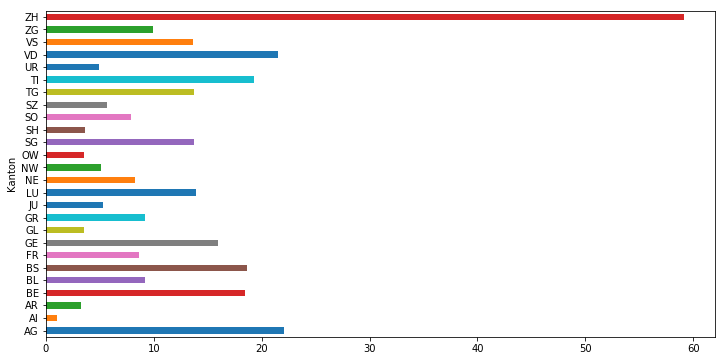

In [52]:
df_kantonsarchive_2016.groupby("Kanton")["1.5.0 Stellentotal"].sum().plot(kind="barh", figsize=(12,6))

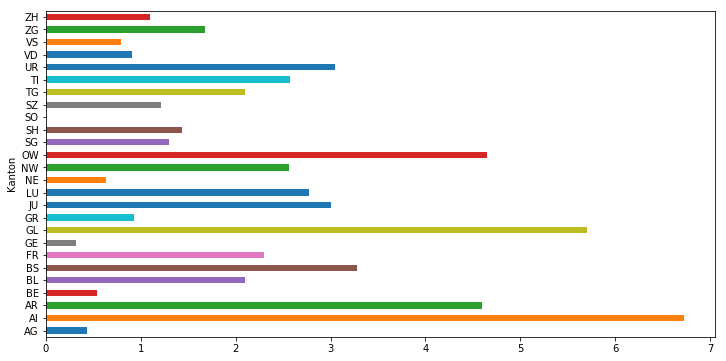

In [53]:
df_kantonsarchive_2016.groupby("Kanton")["Verzeichniseintraege pro Einwohner"].sum().plot(kind="barh", figsize=(12,6))

In [54]:
df_kantonsarchive_2016.dtypes

index                                                            int64
Region                                                          object
KTNR                                                           float64
Aufwand                                                        float64
Jahr                                                             int64
1.1.0 Beschäftigte auf Etatstellen                             float64
1.2.0 Etatstellen                                              float64
1.3.0 Beschäftigte auf Temporärstellen                         float64
1.4.0 Temporärstellen                                          float64
2.1.0 Laufmeter erschlossenes Archivgut (Papier)               float64
2.2.0 Gesamtanzahl der Verzeichnungseinträge                   float64
3.1.0 Laufmeter Neuzugänge im Berichtsjahr                     float64
3.2.0 Laufmeter neu erschlossenes Archivgut                    float64
3.3.0 Neu erfasste Verzeichnungseinträge                       float64
4.1.1 

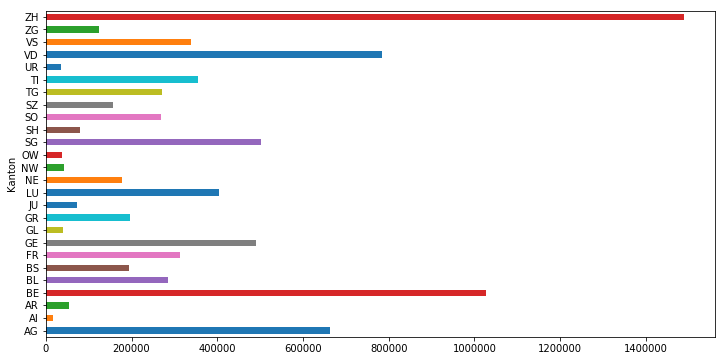

In [55]:
df_kantonsarchive_2016.groupby('Kanton')['Einwohner'].sum().plot(kind="barh", figsize=(12,6))

In [57]:
df_kantonsarchive_2016["Verzeichniseintraege pro Laufmeter Akten"] = df_kantonsarchive_2016["2.2.0 Gesamtanzahl der Verzeichnungseinträge"] / df_kantonsarchive_2016["2.1.0 Laufmeter erschlossenes Archivgut (Papier)"]

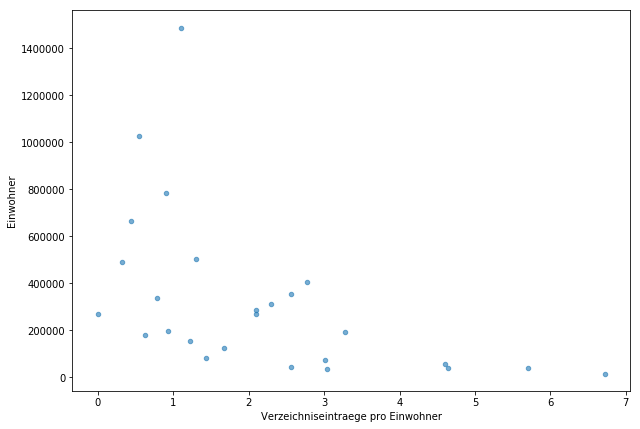

In [58]:
df_kantonsarchive_2016.plot(kind='scatter', x='Verzeichniseintraege pro Einwohner', y='Einwohner', alpha=0.6, figsize=(10,7))

Und hier beginnt der Versuch, die Daten Indikatoren mit Hilfe einer Landkarte zu visualisieren:

In [59]:
gdf_ch = gpd.read_file("shp/g1l17.shp")
gdf_ch.head(2)

,CODE_ISO,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,Z_MIN,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,CH,4129079,485411,833841,75270,295934,659600,201300,192,4631,1306,1079,2485411,2833841,1075270,1295934,2659600,1201300,"POLYGON ((684983.9200000018 295673.9862499982,..."


In [60]:
gdf_lakes = gpd.read_file('shp/g1s17.shp')
gdf_lakes.head(2)

,GMDNR,GMDNAME,SEE_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,Shape_Le_1,Shape_Ar_1,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,9040,Greifensee,830,691664,695945,241896,247739,693800,245200,15459.816399,8.720091e+06,2691664,2695945,1241896,1247739,2693800,1245200,"POLYGON ((695431.5425000004 242400.4287500009,..."
1,9050,Zürichsee,8805,682600,714352,227657,247369,690500,235000,88407.094285,9.170169e+07,2682600,2714352,1227657,1247369,2690500,1235000,"POLYGON ((682667.2287500016 247385.5425000004,..."


In [61]:
gdf_kantone = gpd.read_file("shp/g1k17.shp")
gdf_kantone

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,1291,533,504,2669244,2716900,1223896,1283343,2691800,1252000,"POLYGON ((692429.2019999996 281173.7069999985,..."
1,2,Bern / Berne,2,595952,556241,677745,130585,243834,614200,185600,...,4271,1198,979,2556241,2677745,1130585,1243834,2614200,1185600,(POLYGON ((573502.2039999999 194804.7199999988...
2,3,Luzern,6,149352,630127,681764,180569,237691,651000,213100,...,2348,770,680,2630127,2681764,1180569,1237691,2651000,1213100,"POLYGON ((662037.5579999983 237690.7230000012,..."
3,4,Uri,6,107654,673344,715795,153452,205339,690800,180700,...,3628,1900,1975,2673344,2715795,1153452,1205339,2690800,1180700,"POLYGON ((688456.9990000017 203340, 688740 200..."
4,5,Schwyz,6,90788,672166,718719,193657,231067,700100,213100,...,2800,1096,1053,2672166,2718719,1193657,1231067,2700100,1213100,"POLYGON ((705202.6779999994 229721.1110000014,..."
5,6,Obwalden,6,49058,646044,681478,178345,203583,658700,189900,...,3238,1337,1368,2646044,2681478,1178345,1203583,2658700,1189900,(POLYGON ((671653.3999999985 190588.0009999983...
6,7,Nidwalden,6,27585,659303,686448,180483,208075,673600,197700,...,2898,1071,986,2659303,2686448,1180483,1208075,2673600,1197700,"POLYGON ((671798.2509999983 206022.8359999992,..."
7,8,Glarus,5,68531,709273,738138,183891,225967,723700,204600,...,3608,1579,1594,2709273,2738138,1183891,1225967,2723700,1204600,"POLYGON ((723477.3999999985 221272.4100000001,..."
8,9,Zug,6,23873,672418,695749,215061,233506,683300,223500,...,1579,664,638,2672418,2695749,1215061,1233506,2683300,1223500,"POLYGON ((674191.8999999985 231111.9990000017,..."
9,10,Fribourg / Freiburg,2,167142,546837,595531,143053,206219,573800,173100,...,2388,855,750,2546837,2595531,1143053,1206219,2573800,1173100,(POLYGON ((549140.9800000004 178013.7609999999...


(467989.63319999835, 851259.2407999996, 52313.7245000014, 309215.21549999993)

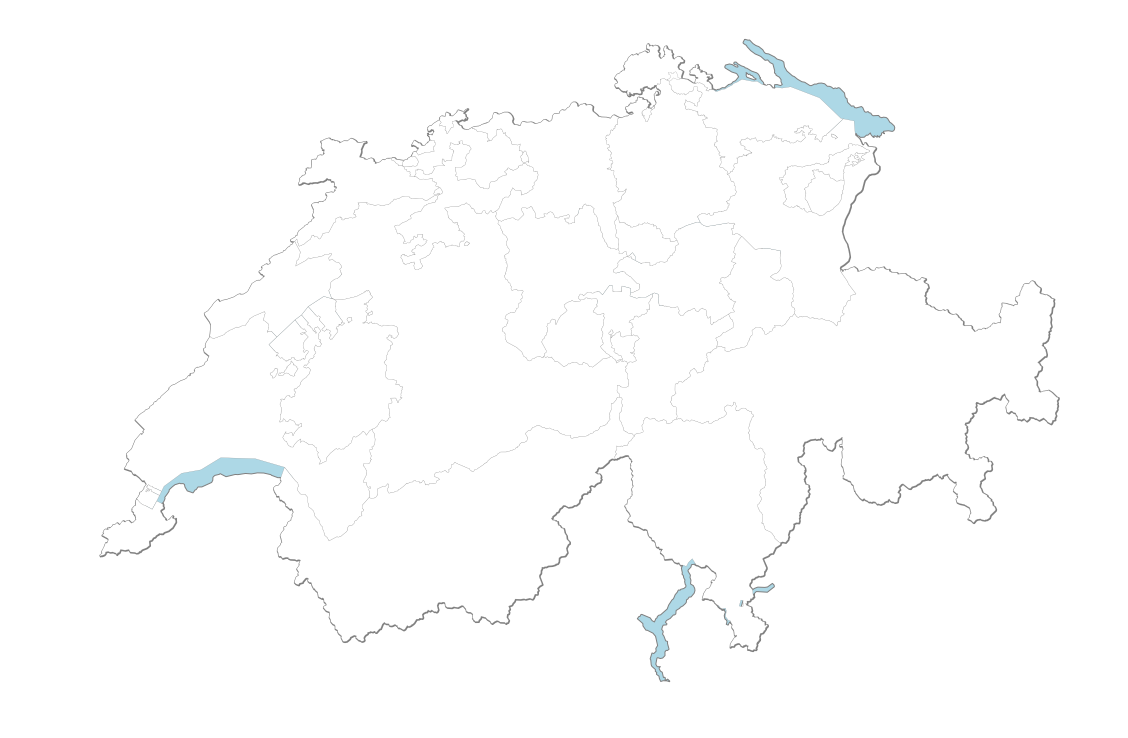

In [62]:
ax = gdf_ch.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)
gdf_kantone.plot(edgecolor='grey', color='white', alpha=1, linewidth=0.2, ax=ax)
ax.axis('off')

In [63]:
gdf_kantone_m = gdf_kantone.merge(df_kantonsarchive_2016, how="inner", left_on="KTNR", right_on="KTNR")

In [64]:
gdf_kantone_m.head(3)

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,1.5.0 Stellentotal,1.6.0 Beschäftigte Total,Kanton,Einwohner in 1000,Einwohner,Verzeichniseintraege pro Einwohner,Verzeichnungsproduktivitaet,Onlineeintraege pro Einwohner,Verzeichniseintraege pro Laufmeter Akten,Kosten pro Verzeichniseintraege 2016
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,59.1,90.0,ZH,1487.97,1487969.0,1.099529,3951.607445,0.568291,46.417142,NaN
1,2,Bern / Berne,2,595952,556241,677745,130585,243834,614200,185600,...,18.5,26.0,BE,1026.51,1026513.0,0.540943,541.513514,0.450130,19.936988,382.92234
2,3,Luzern,6,149352,630127,681764,180569,237691,651000,213100,...,13.9,25.0,LU,403.397,403397.0,2.771463,1151.079137,1.514637,65.764706,218.75000


In [65]:
#Hier wir die Typo der Chart-Titel definiert

title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}

Visualisierungsversuch 1: Verzeichniseinträge in den Staatsarchiven pro Einwohner nach Kantonen. Nicht überraschend stechen kleine Kantone hervor: Hier gibt es angesichts der geringeren Skalierung der Verwaltung vergleichsweise viele "Amtshandlungen" pro Einwohner.

/Users/edzardschade/.virtualenvs/erstesVE/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


(467989.63319999835, 851259.2407999996, 52313.7245000014, 309215.21549999993)

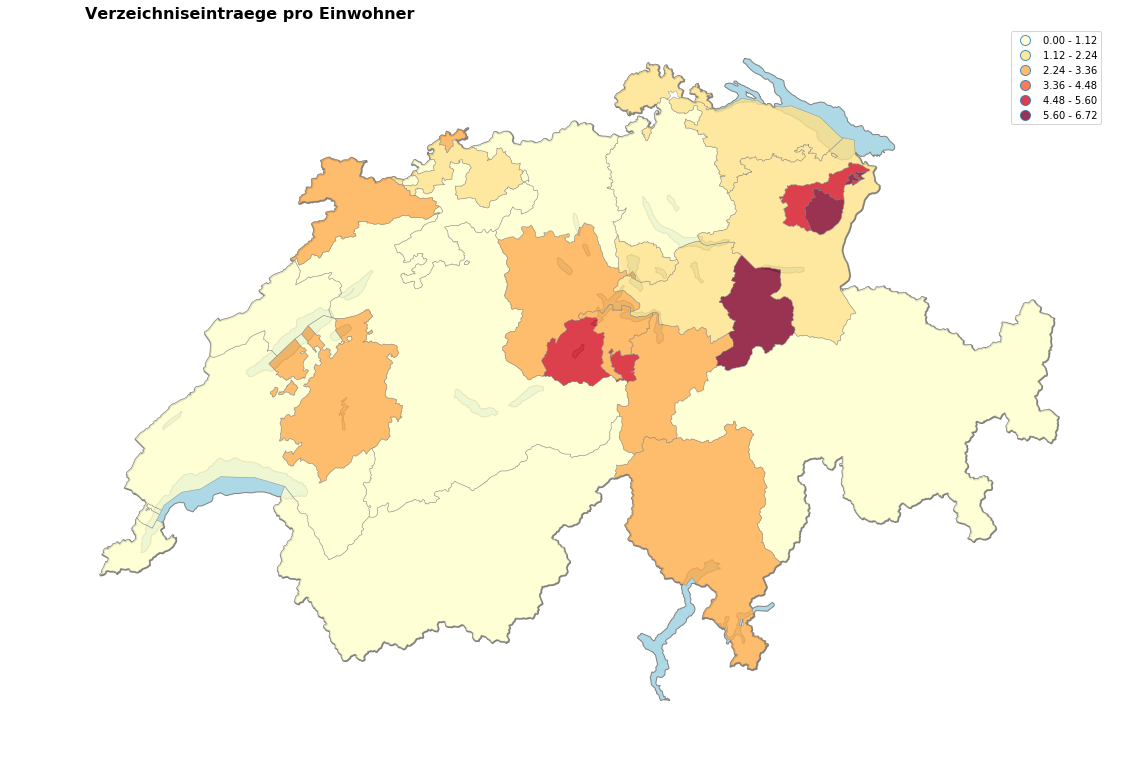

In [66]:
#Selber Code wie oben, für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

#Code für die Kantone, eingefärbt nach der Spalte "Verzeichniseintraege pro Einwohner"
#gdf_kantone_m.plot(edgecolor='grey', column="Verzeichniseintraege pro Einwohner", cmap='YlOrRd', scheme='equal_interval', k=6, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

gdf_kantone_m[gdf_kantone_m["Verzeichniseintraege pro Einwohner"].notnull()].plot(edgecolor='grey', column="Verzeichniseintraege pro Einwohner", cmap='YlOrRd', scheme='equal_interval', k=6, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

my_title = "Verzeichniseintraege pro Einwohner"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

Visualisierungsversuch 2: Verzeichnungsproduktivität (Anzahl der 2016 erbrachten Erschliessungen / Stellentotal) der Staatsarchive nach Kantonen.

(467989.63319999835, 851259.2407999996, 52313.7245000014, 309215.21549999993)

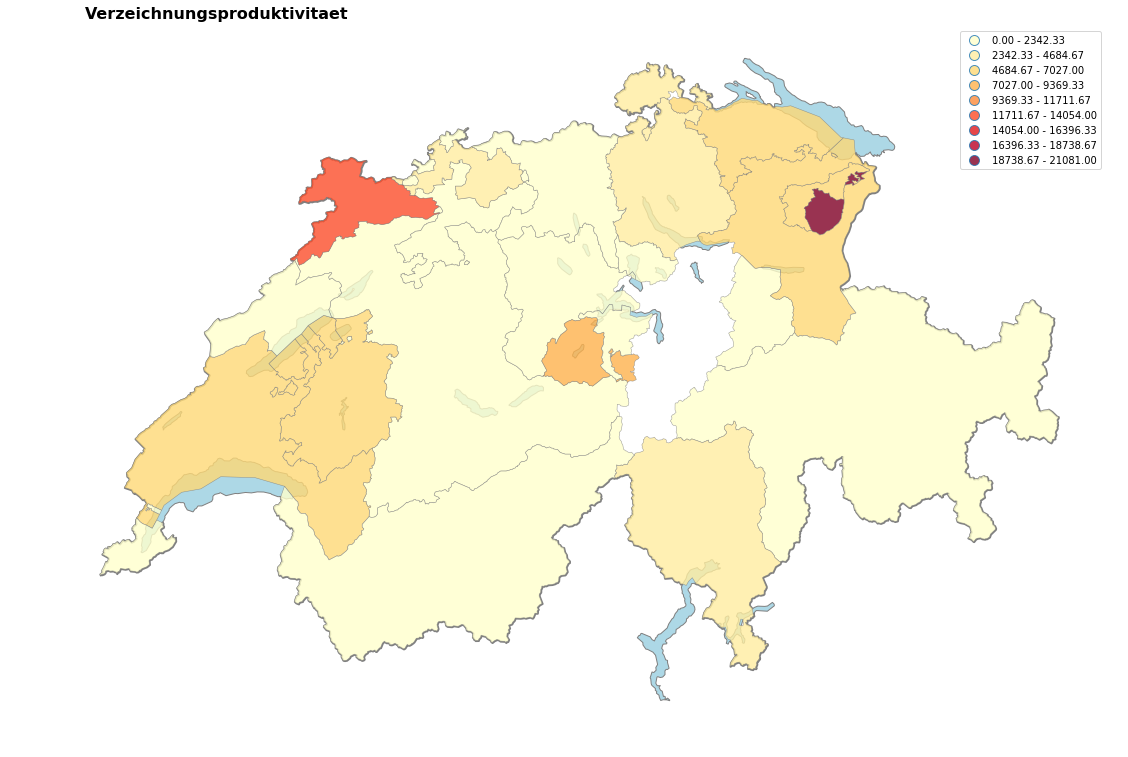

In [67]:
#Selber Code wie oben, für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

#Code für die Kantone, eingefärbt nach der Spalte "Verzeichnungsproduktivitaet"
#gdf_kantone_m.plot(edgecolor='grey', column = "Verzeichnungsproduktivitaet", cmap='YlOrRd', scheme='equal_interval', k=6, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

gdf_kantone_m[gdf_kantone_m["Verzeichnungsproduktivitaet"].notnull()].plot(edgecolor='grey', column = "Verzeichnungsproduktivitaet", cmap='YlOrRd', scheme='equal_interval', k=9, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

my_title = "Verzeichnungsproduktivitaet"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

3. Visualisierungsversuch: Wieviel Kantonsgeschichte ist online abrufbar? Gewichtet nach Einwohnerzahl

(467989.63319999835, 851259.2407999996, 52313.7245000014, 309215.21549999993)

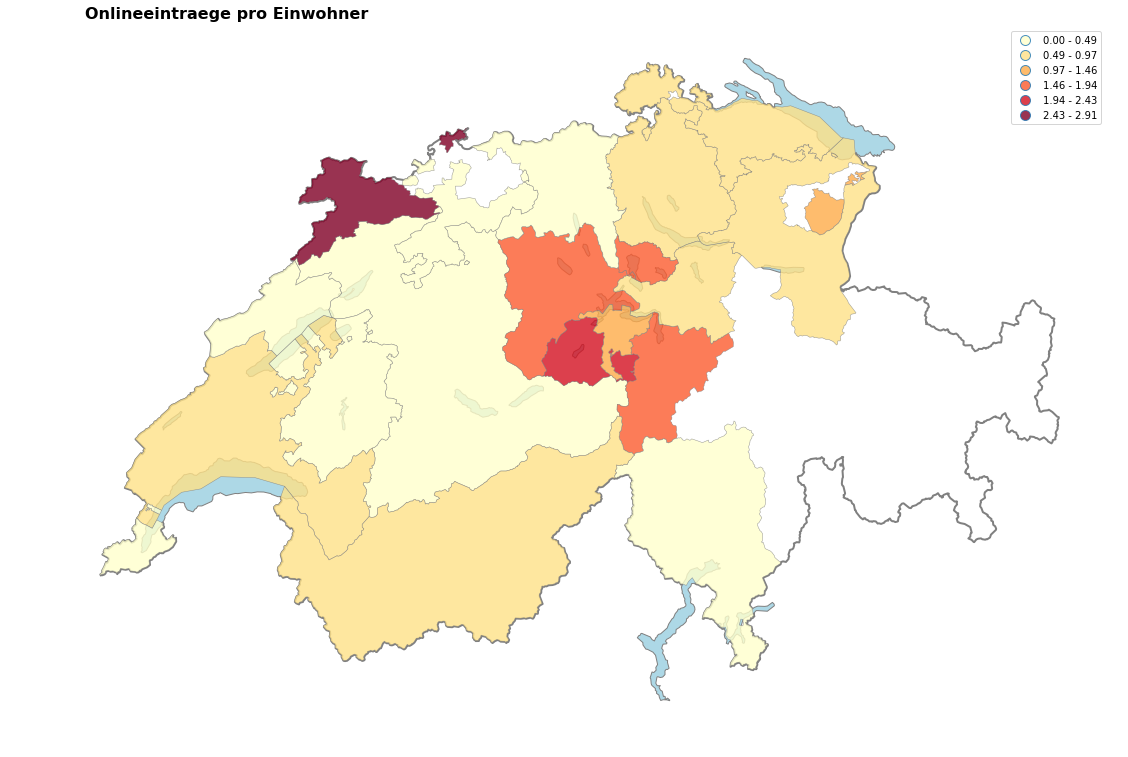

In [68]:
#Selber Code wie oben, für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

#Code für die Kantone, eingefärbt nach der Spalte "Onlineeintraege pro Einwohner"
#gdf_kantone_m.plot(edgecolor='grey', column = "Onlineeintraege pro Einwohner", cmap='YlOrRd', scheme='quantiles', alpha=0.8, linewidth=0.5, ax=ax, legend=True)

gdf_kantone_m[gdf_kantone_m["Onlineeintraege pro Einwohner"].notnull()].plot(edgecolor='grey', column = "Onlineeintraege pro Einwohner", cmap='YlOrRd', scheme='equal_interval', k=6, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

my_title = "Onlineeintraege pro Einwohner"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

4. Visualisierungsversuch: Wieviel Kantonsgeschichte ist online recherchierbar?

(467989.63319999835, 851259.2407999996, 52313.7245000014, 309215.21549999993)

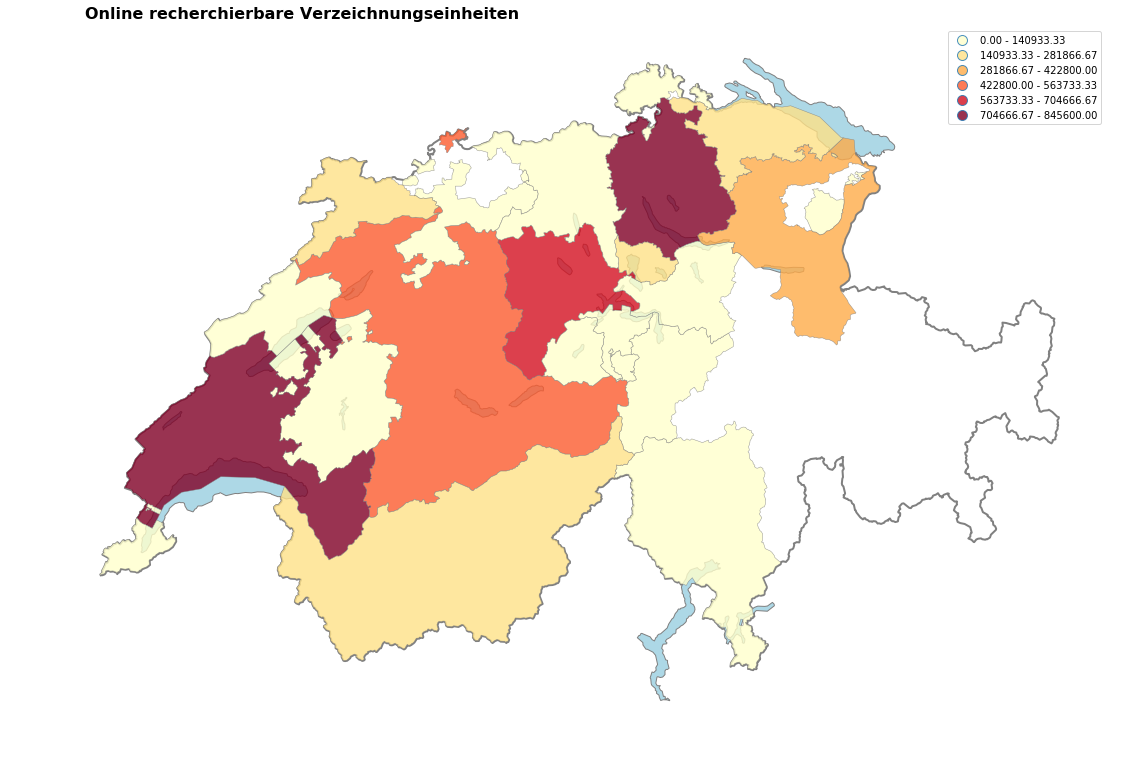

In [69]:
#Selber Code wie oben, für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

#Code für die Kantone, eingefärbt nach der Spalte "5.2.1 Online recherchierbare Verzeichnungseinheiten"
#mit .notnull() nehme ich die die NaN- und 0-Werte raus.
gdf_kantone_m[gdf_kantone_m['5.2.1 Online recherchierbare Verzeichnungseinheiten'].notnull()].plot(edgecolor='grey', column = "5.2.1 Online recherchierbare Verzeichnungseinheiten", cmap='YlOrRd', scheme='equal_interval', k=6, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

my_title = "Online recherchierbare Verzeichnungseinheiten"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

Da kann etwas nicht stimmen: In Zürich z.B. haben wir doch einen hohen Wert. Überprüfen!

In [70]:
gdf_kantone_m[["5.2.1 Online recherchierbare Verzeichnungseinheiten" , "Kanton"]].sort_values('5.2.1 Online recherchierbare Verzeichnungseinheiten')

,5.2.1 Online recherchierbare Verzeichnungseinheiten,Kanton
10,0.0,SO
15,21554.0,AI
20,31508.0,TI
6,58474.0,NW
3,59354.0,UR
13,73577.0,SH
23,84678.0,NE
5,87908.0,OW
18,110937.0,AG
24,122849.0,GE


nutzbare Schemas für den plot:

quantiles = teilt die Fälle in gleichgrosse Gruppen ein
equal_interval = teil Werteskale in gleiche Schritte ein, mit k = n gebe ich an, wieviele Unterteilungen vorgenommen werden sollen


(467989.63319999835, 851259.2407999996, 52313.7245000014, 309215.21549999993)

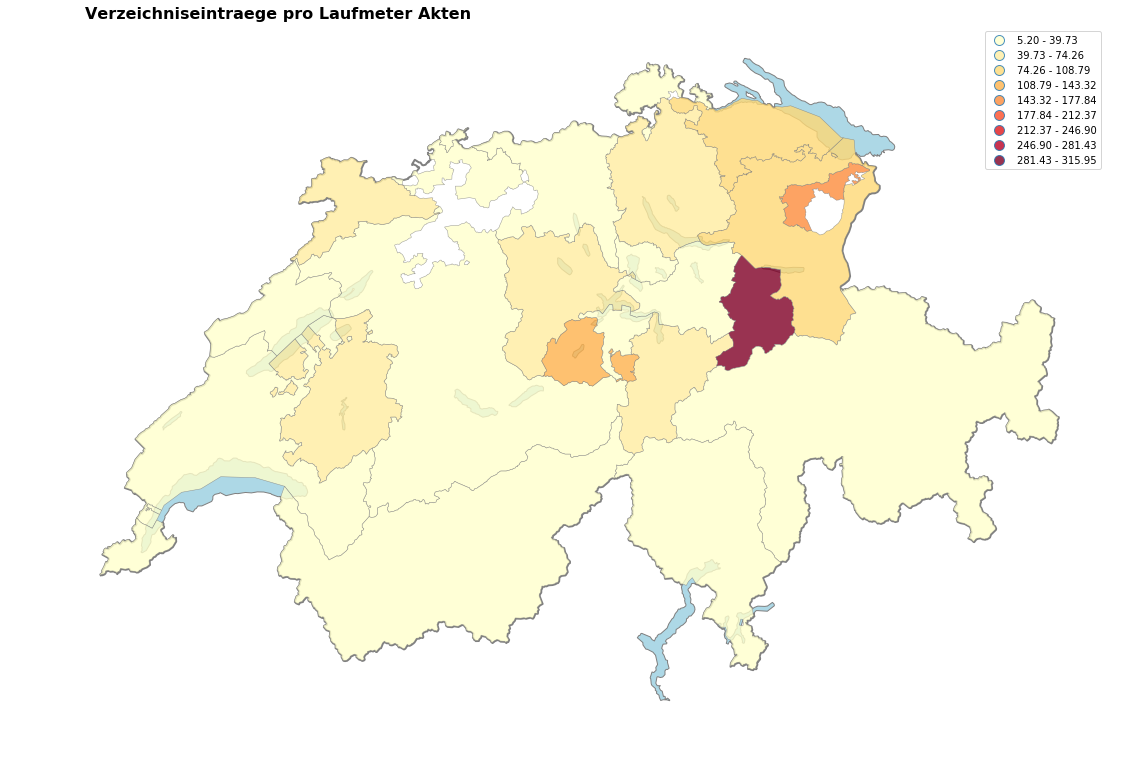

In [71]:
#Selber Code wie oben, für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

#mit .notnull() nehme ich die die NaN- und 0-Werte raus.
gdf_kantone_m[gdf_kantone_m["Verzeichniseintraege pro Laufmeter Akten"].notnull()].plot(edgecolor='grey', column = "Verzeichniseintraege pro Laufmeter Akten", cmap='YlOrRd', scheme='equal_interval', k=9, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

my_title = "Verzeichniseintraege pro Laufmeter Akten"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')

(468012.53868749924, 851258.1500624996, 52313.7245000014, 309215.21549999993)

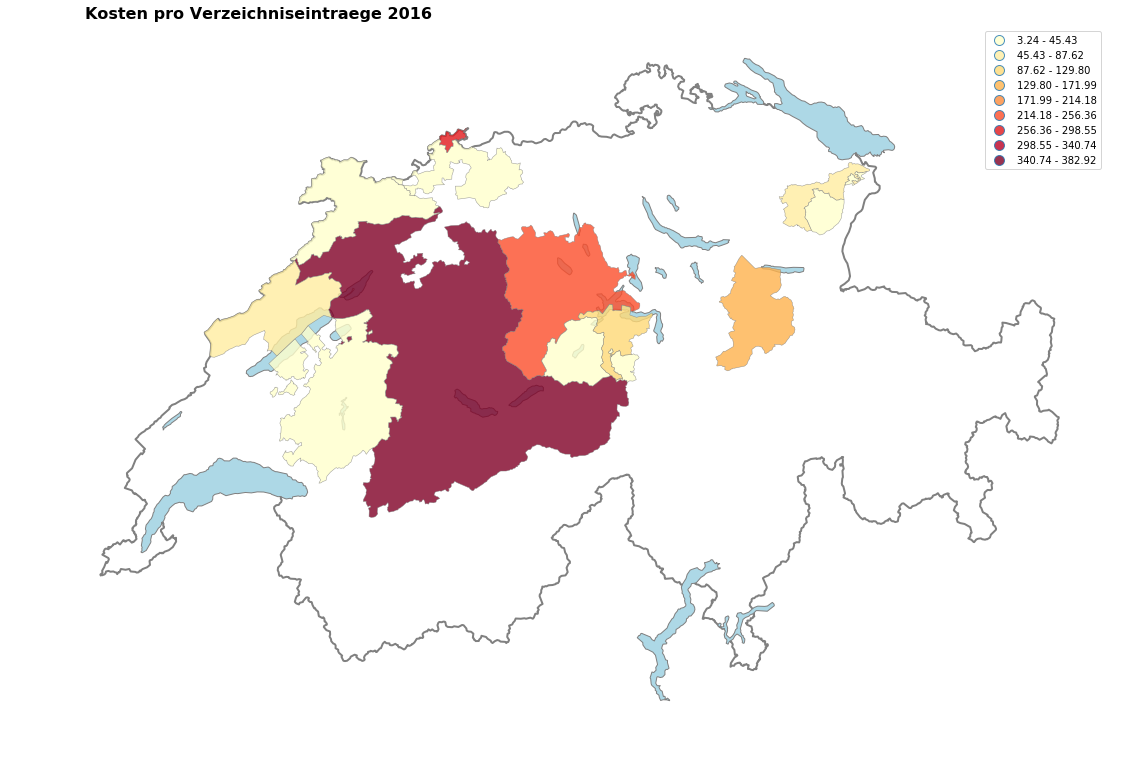

In [72]:
#Selber Code wie oben, für die Landesgrenzen und die Seen
ax = gdf_ch.plot(edgecolor='grey', color='white', alpha=1, linewidth=2, figsize=(20,13))
gdf_lakes.plot(edgecolor='grey', facecolor='lightblue', alpha=1, linewidth=1, ax=ax)

#mit .notnull() nehme ich die die NaN- und 0-Werte raus.
gdf_kantone_m[gdf_kantone_m["Kosten pro Verzeichniseintraege 2016"].notnull()].plot(edgecolor='grey', column = "Kosten pro Verzeichniseintraege 2016", cmap='YlOrRd', scheme='equal_interval', k=9, alpha=0.8, linewidth=0.5, ax=ax, legend=True)

my_title = "Kosten pro Verzeichniseintraege 2016"
plt.text(480000, 312000, my_title, fontdict=title_font)

ax.axis('off')